# Tensorflow 实现数字识别

In [2]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


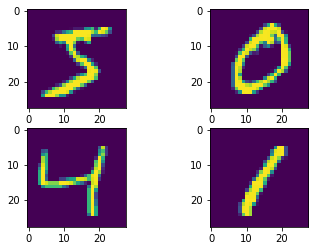

In [4]:
plt.subplot(221)
plt.imshow(x_train[0])
plt.subplot(222)
plt.imshow(x_train[1])
plt.subplot(223)
plt.imshow(x_train[2])
plt.subplot(224)
plt.imshow(x_train[3])

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## 普通神经网络

In [6]:
nnModel = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(10, activation='softmax')]) 
# 三层分别是输入层，隐藏层和输出层，隐藏层使用的激活函数是relu，输出层使用的是softmax函数(10个输出)
nnModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

In [52]:
nnModel.fit(x_train, y_train, epochs=20) # 训练数据集迭代20次

Epoch 1/20
1875/1875 [==============================] - 1s 657us/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9236
Epoch 2/20
1875/1875 [==============================] - 1s 609us/step - loss: 0.1174 - sparse_categorical_accuracy: 0.9646
Epoch 3/20
1875/1875 [==============================] - 1s 613us/step - loss: 0.0808 - sparse_categorical_accuracy: 0.9760
Epoch 4/20
1875/1875 [==============================] - 1s 627us/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9813
Epoch 5/20
1875/1875 [==============================] - 1s 603us/step - loss: 0.0488 - sparse_categorical_accuracy: 0.9843
Epoch 6/20
1875/1875 [==============================] - 1s 597us/step - loss: 0.0378 - sparse_categorical_accuracy: 0.9879
Epoch 7/20
1875/1875 [==============================] - 1s 655us/step - loss: 0.0306 - sparse_categorical_accuracy: 0.9902
Epoch 8/20
1875/1875 [==============================] - 1s 665us/step - loss: 0.0247 - sparse_categorical_accuracy: 0.9924
Epoch 9/20
1875/

In [53]:
loss, acc = nnModel.evaluate(x_test, y_test) # 评估测试集，损失+正确率

313/313 [==============================] - 0s 410us/step - loss: 0.1165 - sparse_categorical_accuracy: 0.9774


In [54]:
print("Loss is {}".format(loss))
print("Accuracy is {}".format(acc))

Loss is 0.1164616122841835
Accuracy is 0.977400004863739


## Tensorflow2.0实现LeNet-5网络

第一层

    卷积层：大小 -> 5*5*1, 过滤器个数 -> 6, 激活函数 -> sigmoid, padding -> same

    池化层：大小 -> 2*2*1,  步幅 -> 2
    
第二层：

    卷积层：大小 -> 16*16*1, 过滤器个数 -> 6, 激活函数 -> sigmoid, padding -> same

    池化层：大小 -> 2*2*1,  步幅 -> 2

第三层：

    卷积后的结果输出为向量

第四层：

    全链接层：120个神经元 + sigmoid激活函数

第五层：

    全链接层：84个神经元 + sigmoid激活函数

第六层：

    输出层：使用softmax激活函数输出，大小为10
    

In [6]:
lenet5 = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', input_shape=(28, 28, 1), padding='same'),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
tf.keras.layers.Conv2D(filters=16, kernel_size=6, activation='sigmoid', padding='same'),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(120, activation='sigmoid'),
tf.keras.layers.Dense(84, activation='sigmoid'),
tf.keras.layers.Dense(10, activation='softmax')
])
lenet5.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy') # 使用adam算法优化，交叉熵计算损失
lenet5.fit(x_train, y_train, epochs=20) # 迭代20次

Epoch 1/20


2022-05-23 16:31:31.438558: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 11s 6ms/step - loss: 0.7113 - sparse_categorical_accuracy: 0.7687
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1342 - sparse_categorical_accuracy: 0.9589
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0907 - sparse_categorical_accuracy: 0.9715
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0696 - sparse_categorical_accuracy: 0.9784
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0566 - sparse_categorical_accuracy: 0.9819
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0471 - sparse_categorical_accuracy: 0.9850
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9868
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0362 - sparse_categorical_accuracy: 0.9887
Epoch 9/20
1875/1875 [=============

In [7]:
loss, acc = lenet5.evaluate(x_test, y_test)
print('Loss is {}'.format(loss))
print('Accuracy is {}'.format(acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0358 - sparse_categorical_accuracy: 0.9897
Loss is 0.03579775616526604
Accuracy is 0.9897000193595886
